# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '../data/home-credit-default-risk/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print(('Path of read in data: %s' % (f_app)))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/home-credit-default-risk/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
#1
cut_rule = [0,1,3,6,app_train['CNT_CHILDREN'].max()+1]

# pd.cut()的用法：
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
# https://medium.com/@morris_tai/pandas的cut-qcut函數-93c244e34cfc
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-0.001, 1.0]    276490
(1.0, 3.0]        30466
(3.0, 6.0]          534
(6.0, 20.0]          21
Name: CNT_CHILDREN_GROUP, dtype: int64

In [5]:
# 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 boxplot
#2-1 
grp = ['CNT_CHILDREN_GROUP','TARGET']
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
(-0.001, 1.0]       0         168554.452269
                    1         166133.317001
(1.0, 3.0]          0         173824.963059
                    1         161627.570234
(3.0, 6.0]          0         173158.841202
                    1         150114.705882
(6.0, 20.0]         0         134500.000000
                    1         255000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [6]:
# 各組的 AMT_INCOME_TOTAL 的中位數
grouped_df.median()

CNT_CHILDREN_GROUP  TARGET
(-0.001, 1.0]       0         148500.0
                    1         135000.0
(1.0, 3.0]          0         157500.0
                    1         135000.0
(3.0, 6.0]          0         157500.0
                    1         135000.0
(6.0, 20.0]         0         112500.0
                    1         270000.0
Name: AMT_INCOME_TOTAL, dtype: float64

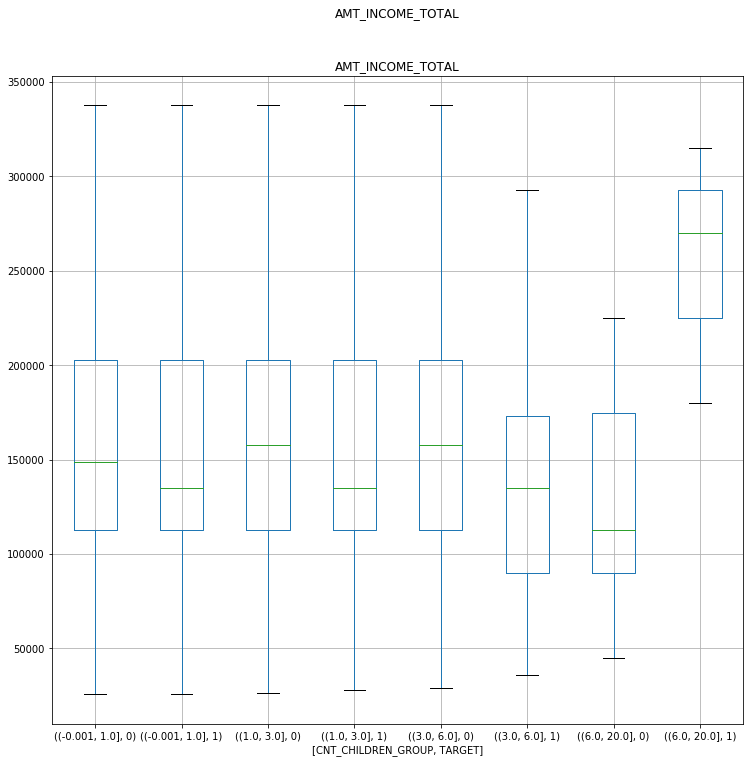

In [7]:
#2-2
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

# showfliers:是否顯示異常值
# https://www.itread01.com/content/1548231665.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
# https://zhuanlan.zhihu.com/p/30029425
app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('AMT_INCOME_TOTAL')
plt.show()

In [8]:
#3 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.045954
1,270000.0,0.962147
2,67500.0,-0.958437
3,135000.0,-0.318243
4,121500.0,-0.446282


## 補充筆記_df.boxplot的用法：

<Figure size 432x288 with 0 Axes>

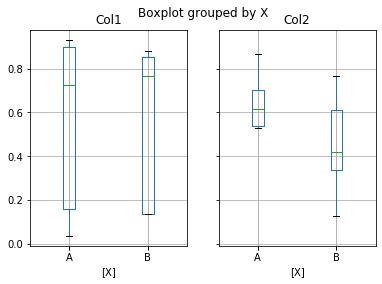

In [9]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
plt.figure()
bp = df.boxplot(by='X')

In [10]:
df = pd.DataFrame(np.random.randn(10,3),columns=['Col1', 'Col2', 'Col3'])
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A',
                           'B', 'B', 'B', 'B', 'B'])
df['Y'] = pd.Series(['A', 'B', 'A', 'B', 'A',
                           'B', 'A', 'B', 'A', 'B'])
df

,Col1,Col2,Col3,X,Y
0,-0.808498,0.255600,-0.138156,A,A
1,-2.126590,-0.679759,1.316857,A,B
2,-0.227576,-1.136365,1.309633,A,A
3,0.285389,-0.357337,0.314933,A,B
4,0.836464,-0.122689,1.142879,A,A
5,0.341315,0.132602,1.989536,B,B
6,-2.860062,2.064213,-0.973586,B,A
7,-1.012960,-0.836848,-0.249297,B,B
8,-1.004793,-1.038628,-1.142301,B,A
9,-0.070242,-0.285617,0.529232,B,B
